<a href="https://colab.research.google.com/github/SJhawar1010/Machine-Learning/blob/main/2348554_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [9]:
print(data['itemDescription'].unique())

['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whipped/sour cream' 'frozen vegetable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
print(data['itemDescription'].value_counts())


whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bar plot has been truncated to show only 30 bars


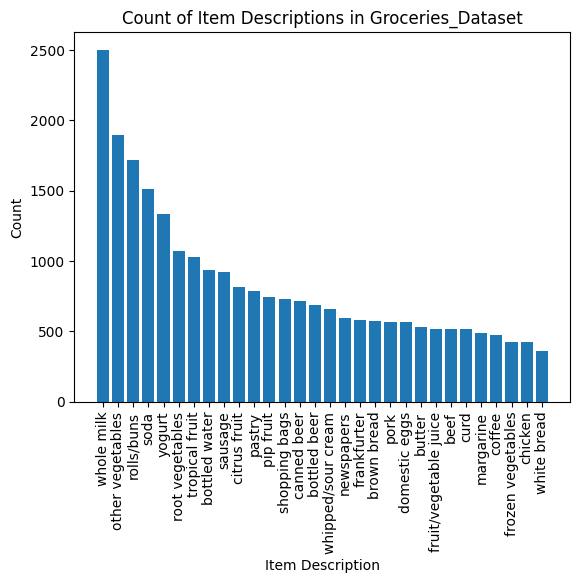

In [11]:
item_counts = data['itemDescription'].value_counts()

# Get bar names
bar_names = item_counts.index.astype(str).to_list()

# Get maximum bar name string lengths
max_name_length = 0
for name in bar_names:
  max_name_length = max(max_name_length, len(name))

# Get total number of bars
n_bars = len(bar_names)

# Rotate x axis labels if number of bars and max_name_length are large
if n_bars * max_name_length >= 50:
  if n_bars >= 20:
    plt.xticks(rotation=90)
  else:
    plt.xticks(rotation=45)

# Remove extra bars because car chart can not show more than 30 bars properly
if n_bars > 30:
  item_counts = item_counts.head(30)
  print('Bar plot has been truncated to show only 30 bars')

# Create a bar chart of the item counts
plt.bar(item_counts.index, item_counts.values)
plt.xlabel("Item Description")
plt.ylabel("Count")
plt.title("Count of Item Descriptions in Groceries_Dataset")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


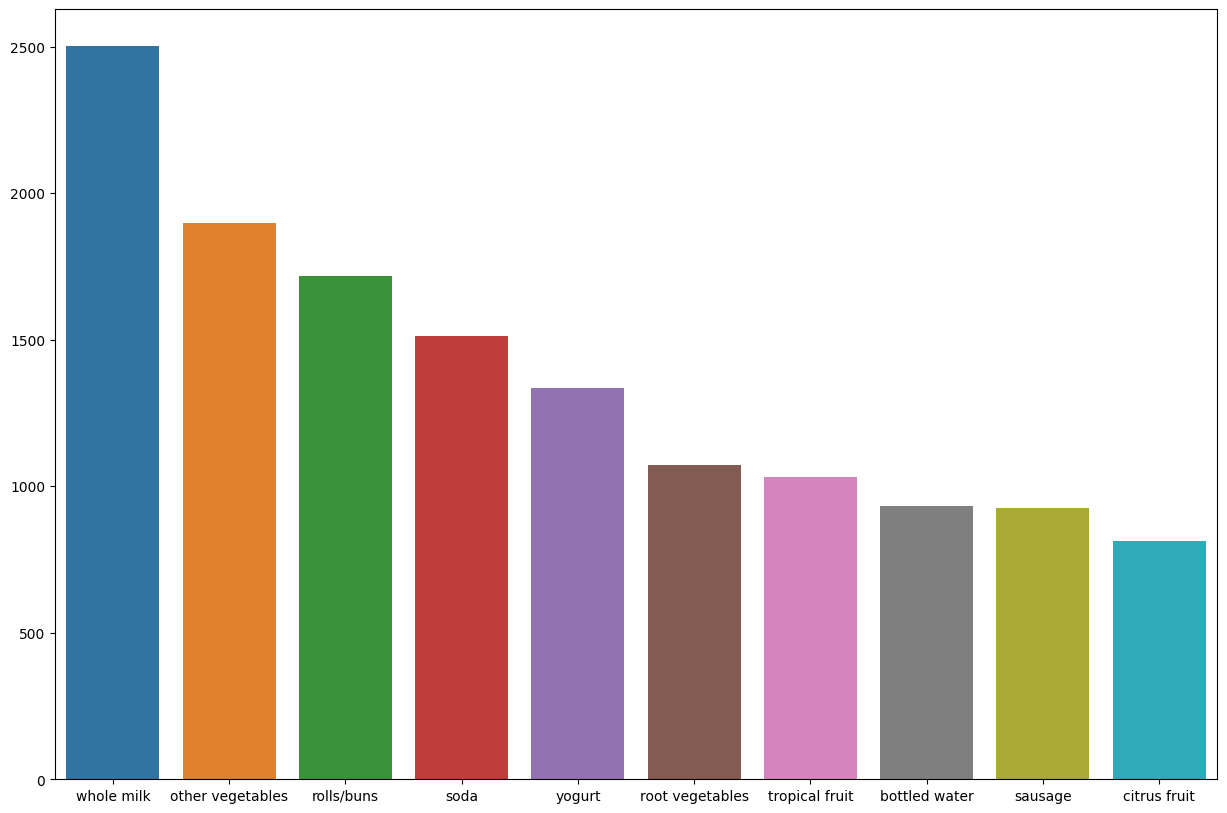

In [12]:
#top 10 most selling
x=data['itemDescription'].value_counts().sort_values(ascending=False)[:10]
x
plt.figure(figsize=(15,10))
sns.barplot(x=x.index,y=x.values)
plt.show()

In [13]:
data['Quantity']=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
transactions=data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [16]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
transactions=transactions.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
def encode(x):
  if x<=0:
    return 0
  elif x>=0:
    return 1
basket=transactions.applymap(encode)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
frequent_itemset=apriori(basket,min_support=0.06,use_colnames=True)
rules=association_rules(frequent_itemset,metric='lift',min_threshold=1)
#to calculate association between variables,if >1 then strong elif <1 weak, if<=1 then ignore

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [22]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,0.007582,1.026461,0.184748


In [23]:
rules[(rules['confidence']>0.4)&(rules['lift']>1)][:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
7,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
8,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969,0.181695
15,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
19,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087
21,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661,0.142501
23,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,0.004994,1.050962,0.089008
25,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,0.008931,1.090663,0.160404
27,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299


In [24]:
bestchoice=rules.sort_values(by='lift',ascending=False)
print("Best choices are")
print(bestchoice[['antecedents','consequents','lift']])

Best choices are
                        antecedents                     consequents      lift
144                        (yogurt)  (whole milk, other vegetables)  1.326434
141  (whole milk, other vegetables)                        (yogurt)  1.326434
153        (whole milk, rolls/buns)                        (yogurt)  1.304939
156                        (yogurt)        (whole milk, rolls/buns)  1.304939
143                    (whole milk)      (yogurt, other vegetables)  1.303003
..                              ...                             ...       ...
116                    (whole milk)                          (soda)  1.051973
61               (other vegetables)                          (soda)  1.051695
60                           (soda)              (other vegetables)  1.051695
63               (other vegetables)                (tropical fruit)  1.037642
62                 (tropical fruit)              (other vegetables)  1.037642

[158 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
worstchoice=rules.sort_values(by='lift',ascending=True)
print("Best choices are")
print(worstchoice[['antecedents','consequents','lift']])

Best choices are
                        antecedents                     consequents      lift
62                 (tropical fruit)              (other vegetables)  1.037642
63               (other vegetables)                (tropical fruit)  1.037642
61               (other vegetables)                          (soda)  1.051695
60                           (soda)              (other vegetables)  1.051695
116                    (whole milk)                          (soda)  1.051973
..                              ...                             ...       ...
143                    (whole milk)      (yogurt, other vegetables)  1.303003
156                        (yogurt)        (whole milk, rolls/buns)  1.304939
153        (whole milk, rolls/buns)                        (yogurt)  1.304939
141  (whole milk, other vegetables)                        (yogurt)  1.326434
144                        (yogurt)  (whole milk, other vegetables)  1.326434

[158 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
